In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2
import random

In [2]:
DATADIR="/content/drive/MyDrive/kaggle plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [3]:
%cd /content/drive/MyDrive/kaggle plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


/content/drive/MyDrive/kaggle plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


['Blueberry___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', '.ipynb_checkpoints']


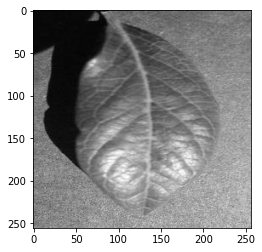

In [4]:
CATEGORIES = []
for item in os.listdir():
    if os.path.isdir(item):
        CATEGORIES.append(item)
print(CATEGORIES)


for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break 

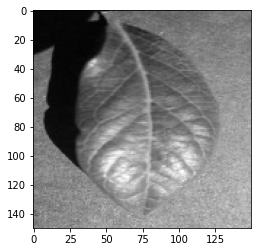

In [5]:
IMG_SIZE = 150
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        counter = 0 # counter variable to keep track of images processed
        for img in os.listdir(path):
            if counter >= 1000: # if counter reaches 1000, break out of the loop
                print(f"Finished processing category: {category}")
                break
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                counter += 1
            except Exception as e:
                pass

In [7]:
create_training_data()
print(len(training_data))

Finished processing category: Blueberry___healthy
Finished processing category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Finished processing category: Corn_(maize)___Northern_Leaf_Blight
Finished processing category: Corn_(maize)___healthy
Finished processing category: Grape___Black_rot
Finished processing category: Grape___Esca_(Black_Measles)
Finished processing category: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Finished processing category: Grape___healthy
Finished processing category: Peach___Bacterial_spot
Finished processing category: Pepper,_bell___Bacterial_spot
Finished processing category: Pepper,_bell___healthy
Finished processing category: Potato___Early_blight
Finished processing category: Potato___Late_blight
Finished processing category: Potato___healthy
Finished processing category: Raspberry___healthy
Finished processing category: Soybean___healthy
Finished processing category: Squash___Powdery_mildew
17000


In [8]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
5
8
3
4
16
3
11
8


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[227]
   [227]
   [228]
   ...
   [196]
   [193]
   [194]]

  [[228]
   [228]
   [229]
   ...
   [191]
   [193]
   [177]]

  [[229]
   [229]
   [229]
   ...
   [192]
   [192]
   [187]]

  ...

  [[175]
   [174]
   [177]
   ...
   [143]
   [143]
   [148]]

  [[177]
   [175]
   [178]
   ...
   [153]
   [142]
   [149]]

  [[179]
   [175]
   [176]
   ...
   [146]
   [145]
   [137]]]]


In [10]:
# # import pickle
# pickle_out = open("X1.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# # pickle_out = open("y.pickle","wb")
# # pickle.dump(y, pickle_out)
# # pickle_out.close()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np

In [12]:
X=X/255.0

In [ ]:
import pickle
with open("X.pickle","rb") as f:
  X = pickle.load(f)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)  
X=X/255.0

In [32]:


model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(17)) #Output layer 
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y = np.array(y)

model.fit(X, y, batch_size=32, epochs=4, validation_split=0.3)

Epoch 1/4
372/372 [==============================] - 843s 2s/step - loss: 1.5952 - accuracy: 0.4919 - val_loss: 0.9104 - val_accuracy: 0.6978
Epoch 2/4
372/372 [==============================] - 843s 2s/step - loss: 0.4812 - accuracy: 0.8429 - val_loss: 0.9286 - val_accuracy: 0.7173
Epoch 3/4
372/372 [==============================] - 844s 2s/step - loss: 0.1981 - accuracy: 0.9326 - val_loss: 0.5651 - val_accuracy: 0.8271
Epoch 4/4
372/372 [==============================] - 847s 2s/step - loss: 0.0957 - accuracy: 0.9676 - val_loss: 0.7123 - val_accuracy: 0.8114


In [33]:
model.save("pathology-detector-optim")

In [35]:
import cv2
import tensorflow as tf

CATEGORIES = ['Blueberry___healthy',
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
              'Corn_(maize)___Northern_Leaf_Blight',
              'Corn_(maize)___healthy',
              'Grape___Black_rot',
              'Grape___Esca_(Black_Measles)',
              'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
              'Grape___healthy',
              'Peach___Bacterial_spot',
              'Pepper,_bell___Bacterial_spot',
              'Pepper,_bell___healthy',
              'Potato___Early_blight',
              'Potato___Late_blight',
              'Potato___healthy',
              'Raspberry___healthy',
              'Soybean___healthy',
              'Squash___Powdery_mildew']


def prepare(filepath):
    IMG_SIZE = 150 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


# model = tf.keras.models.load_model("pathology-detector")

def pathology(link):
  prediction = model.predict([prepare(link)])
  class_index = np.argmax(prediction)
  return class_index
a="/content/drive/MyDrive/kaggle plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG"
m=pathology(a) 
print(CATEGORIES[m])
# print(prediction)  # will be a list in a list.
# print(CATEGORIES[int(prediction[0][0])])



1/1 [==============================] - 0s 109ms/step
Potato___healthy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [29]:
a=1

In [30]:
len(CATEGORIES)

17